In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dataset= pd.read_csv('/content/Credit_Card_Applications.csv')

In [10]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [11]:
X= dataset.iloc[:,:-1].values

In [12]:
y= dataset.iloc[:,-1].values

In [13]:
X  

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [14]:
# Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler(feature_range=(0,1))

In [17]:
X= sc.fit_transform(X)

In [18]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [19]:
# Training The SOM

In [20]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

[]

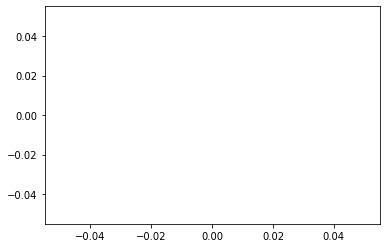

In [21]:
plt.plot(x_axis=['X'],  y_axis=['y'])

from minisom import MiniSom

In [23]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=6eb4da44997d93c73e7e838b58ddcb9b41b7694493c7f95ea9db6b111f754437
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [25]:
from minisom import MiniSom

In [26]:
som = MiniSom(x =10, y= 10, input_len=15,sigma=1.0, learning_rate=0.5)

In [27]:
som.random_weights_init(X)

In [28]:
som.train_random(data=X, num_iteration =100)

In [29]:
# We need the MID now

In [30]:
from pylab import bone, pcolor, colorbar, plot, show 

In [31]:
bone()

<Figure size 432x288 with 0 Axes>

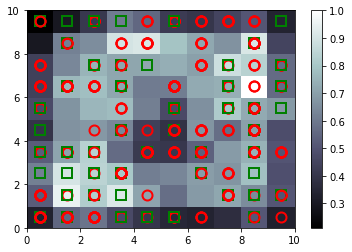

In [44]:
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor= 'None',
       markersize= 10,
       markeredgewidth =2)
show()

In [35]:
# The potential frauds are the Outliers

In [40]:
# we have Two outliers right now

In [41]:
#Finding the frauds
mappings= som.win_map(X)

In [42]:
mappings

defaultdict(list,
            {(3,
              2): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
                     0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.14      , 0.        ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01,

In [43]:
#Mappings is a dictionary

In [45]:
frauds= np.concatenate((mappings[(8,1)],mappings[(6,8)]), axis=0)

In [48]:
frauds= sc.inverse_transform(frauds)
frauds

array([[3.89948720e+12, 1.00000000e+00, 1.36037500e+03, 2.78880000e+02,
        5.00000000e+00, 1.31000000e+02, 1.70000000e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 0.00000000e+00, 1.00001000e+05],
       [3.89432281e+12, 1.00000000e+00, 3.22769500e+03, 3.36000000e+02,
        5.00000000e+00, 9.20000000e+01, 3.30000000e+01, 4.56000000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 2.20000000e+05, 1.00001000e+05],
       [3.91206555e+12, 1.00000000e+00, 2.35787500e+03, 4.62000000e+02,
        3.00000000e+00, 1.05000000e+02, 3.30000000e+01, 1.14000000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 1.60000000e+05, 1.00001000e+05],
       [3.94778729e+12, 1.00000000e+00, 2.11315500e+03, 2.94000000e+02,
        5.00000000e+00, 1.83000000e+02, 3.30000000e+01, 1.85250000e+02,
        1.00000000e+00, 0.00000000e+0

In [50]:
np.ndarray.tolist(frauds)
frauds

array([[3.89948720e+12, 1.00000000e+00, 1.36037500e+03, 2.78880000e+02,
        5.00000000e+00, 1.31000000e+02, 1.70000000e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 0.00000000e+00, 1.00001000e+05],
       [3.89432281e+12, 1.00000000e+00, 3.22769500e+03, 3.36000000e+02,
        5.00000000e+00, 9.20000000e+01, 3.30000000e+01, 4.56000000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+00, 2.20000000e+05, 1.00001000e+05],
       [3.91206555e+12, 1.00000000e+00, 2.35787500e+03, 4.62000000e+02,
        3.00000000e+00, 1.05000000e+02, 3.30000000e+01, 1.14000000e+02,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 1.60000000e+05, 1.00001000e+05],
       [3.94778729e+12, 1.00000000e+00, 2.11315500e+03, 2.94000000e+02,
        5.00000000e+00, 1.83000000e+02, 3.30000000e+01, 1.85250000e+02,
        1.00000000e+00, 0.00000000e+0

We have the IDs of the Frauds in the Frauds Numpy Array later converted to a list